<a href="https://colab.research.google.com/github/amydeng2000/Boba-Shop-Data-Analytics/blob/master/Week_4_18_Confusion_Matrix_%26_Sliders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1kp2AswmfxADkLQPHMVYMji01VIPA5gNy/view?usp=sharing
file = drive.CreateFile({'id':'1kp2AswmfxADkLQPHMVYMji01VIPA5gNy'}) # replace the id with id of file you want to access
file.GetContentFile('labled_data.csv') 

In [ ]:
import numpy as np
import pandas as pd
import nltk
import gensim
import random

# from sklearn.feature_extraction.text import TfidfVectorizer
# import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Load data into dataframe
df = pd.read_csv('labled_data.csv')
df.columns = ['No', 'Feedback', 'Label']
df.dropna(inplace=True)
df.drop([0], inplace=True)
df.insert(2, "Phrases", "")
df.insert(4, "Predicted", 0.0)
df.insert(5, "Actual", 0)
df.head()

,No,Feedback,Phrases,Label,Predicted,Actual
1,1,"Although he was less so as time went on, Brayd...",,Other,0.0,0
2,2,made sure all ideas where heard while presenti...,,Inclusive,0.0,0
3,3,Jason communicated pretty well with the team,,Effective Communicator,0.0,0
4,4,Communicated very well,,Effective Communicator,0.0,0
5,5,Considering multiple solutions to problems we ...,,Problem Solving (Analytical),0.0,0


In [ ]:
df.reset_index(inplace=True)
for i in range(len(df)):
  # Just for visualization purposes, assume Other is also Effective Communicator
  if df.at[i, "Label"] == "Effective Communicator":
    df.at[i, 'Actual'] = 1
  df.at[i, 'Predicted'] = random.random()
df.head(10)

,index,No,Feedback,Phrases,Label,Predicted,Actual
0,1,1,"Although he was less so as time went on, Brayd...",,Other,0.459301,0
1,2,2,made sure all ideas where heard while presenti...,,Inclusive,0.012880,0
2,3,3,Jason communicated pretty well with the team,,Effective Communicator,0.661401,1
3,4,4,Communicated very well,,Effective Communicator,0.913559,1
4,5,5,Considering multiple solutions to problems we ...,,Problem Solving (Analytical),0.751566,0
5,6,6,worked well in team,,Inclusive,0.071149,0
6,7,7,Calvin was a really good at listening to other...,,Active Listener,0.585446,0
7,8,8,Cameron was really effective at helping other ...,,Coaching,0.757794,0
8,9,9,Not being afraid to hear opposition,,Other,0.296431,0
9,10,10,Hugo was always very friendly at the meetings ...,,Other,0.543246,0


In [ ]:
y_actu = pd.Series(df["Actual"], name='Actual')

pred = []
for i in range(len(df)):
  pred.append(df.iloc[i]["Predicted"])

def f(pred, thresh):
  if pred >= thresh:
    return 1
  else:
    return 0
thresh = 0.3

y_pred = pd.Series([f(p, thresh) for p in pred], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Predicted    0    1
Actual             
0          381  939
1           18   45


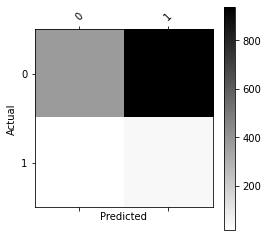

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm      
from matplotlib.widgets import Slider


def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)



# # vals = np.linspace(0,1,10)
# # xgrid, ygrid = np.meshgrid(vals,vals)
# # print(xgrid, ygrid)     

# xgrid = df["Predicted"]  
# ygrid = df["Actual"]

# # x = predicted, y = actual, b = threshold
# def f(x, y, b):
#     if x >= b:
#       return 1
#     else:
#       return 0

# b = 0.5

# ax = plt.subplot(111)
# plt.subplots_adjust(left=0.15, bottom=0.25)
# fig = plt.imshow(f(xgrid, ygrid, b), cm.gray)
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)

# axb = plt.axes([0.15, 0.1, 0.65, 0.03])
# sb = Slider(axb, 'b', 0.1, 10.0, valinit=b)
# def update(val):
#     fig.set_data(f(xgrid, ygrid, val))
# sb.on_changed(update)

# plt.show()

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# Turn on interactive plotting
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# On each update we compute the low rank approximation
def update(k):
#     plt.matshow(plot_confusion_matrix(k), cmap='gray')
    pred = []
    for i in range(len(df)):
        pred.append(df.iloc[i]["Predicted"])

    def f(pred, k):
        if pred >= k:
            return 1
        else:
            return 0
    # thresh = 0.3
    y_actu = pd.Series(df["Actual"], name='Actual')
    y_pred = pd.Series([f(p, k) for p in pred], name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    
    plt.matshow(df_confusion) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    
    return df_confusion


interact(update, k=widgets.FloatSlider(min=0.0, max=1, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='k', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.update>

###Misc Code

AttributeError: ignored

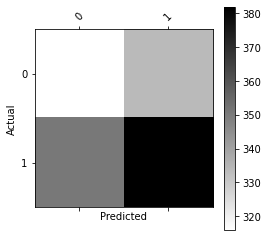

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plt = plot_confusion_matrix(df_confusion)


In [ ]:
fig, ax = plt.subplots()
line = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)
plt.show()

In [ ]:
score_actu = pd.Series(df["Actual"], name='Actual')
score_pred = pd.Series(df["Predicted"], name='Predicted')
df_confusion = pd.crosstab(score_actu, score_pred)
print(df_confusion)

Predicted  0.000626  0.001359  0.001521  ...  0.998429  0.998594  0.998736
Actual                                   ...                              
0                 1         1         0  ...         1         1         0
1                 0         0         1  ...         0         0         1

[2 rows x 1383 columns]
